__Алгоритм Флойда (Floyd's algorithm)__

Позволяет находить кратчайшие пути во взвешанном графе

В отличии от Дейкстры, он работает с отрицательными и положительными весами, а также сразу находит кратчайшее расстояние между всеми вершинами графа.

Построен на принципах динамического программирования.

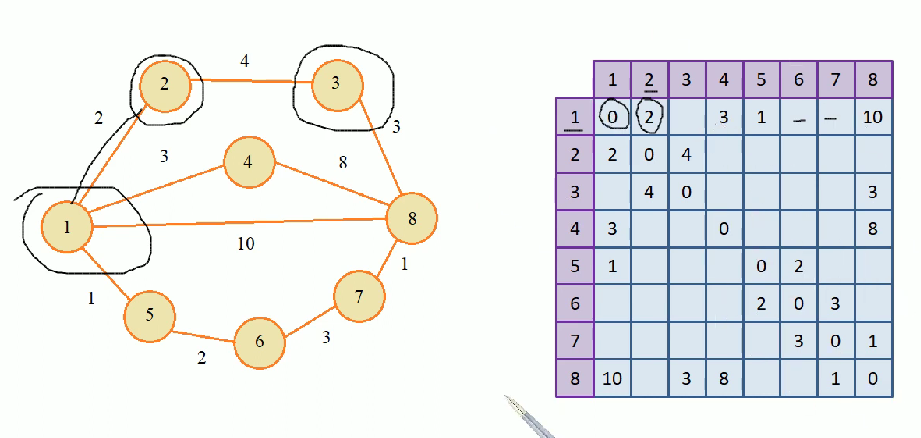

мы выибарем одну основную точку через которую будем проводить маршруты

v - связь между i и j вершиной

крч мы рисуем новые маршруты, допустим создаем новый маршрут v2,5 = v2,1 + v1,5

и такие суммы следует рассмотреть для всех пар вершин

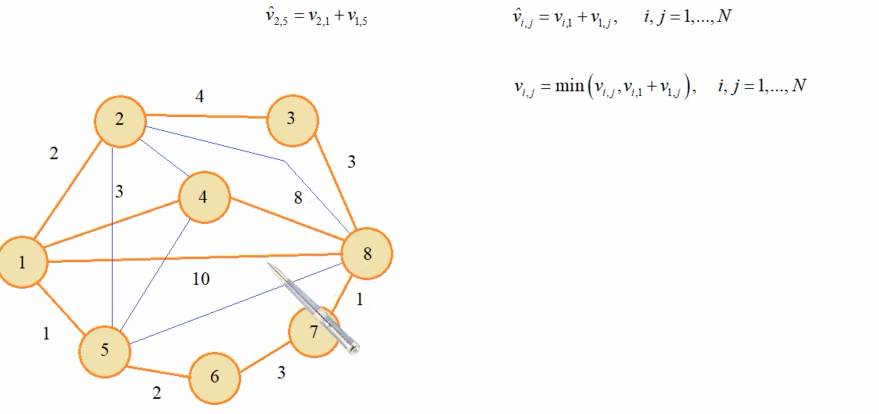

выбираем миниальное значение между значением из таблицы и новым путем, описанным через v

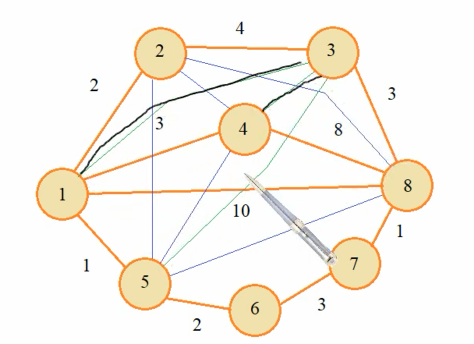

Пример как был получен маршрут от 4 до 3

Для этого была использована связть 2 - 4, которая была вычислена на предудщей итерации

А также 2 - 3

В итоге мы получаем путь 4 - 3, который на самом деле имеет вид 4 -> 1 -> 2 -> 3

В общем случае для формирования минимального маршрут достаточно выполнить следующую операцию:

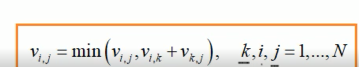

пример маршрута с отрицательным весом и в котором не следует использовать алгоритм флойда:

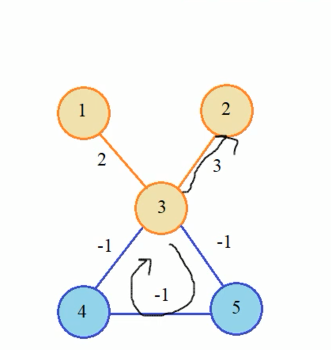

In [1]:
import numpy as np

def floyd_warshall(graph):
    """
    Реализация алгоритма Флойда-Уоршелла для нахождения кратчайших путей между всеми парами вершин.

    Args:
        graph: Матрица смежности, представляющая граф.  
               graph[i][j] - вес ребра от вершины i к вершине j.
               Если ребра нет, используется float('inf').

    Returns:
        Матрица расстояний, где distances[i][j] - длина кратчайшего пути от вершины i к вершине j.
        Возвращает None, если обнаружен отрицательный цикл.
    """

    n = len(graph)
    distances = np.copy(graph)  # Создаем копию матрицы смежности, чтобы не изменять исходную матрицу

    # Основной алгоритм
    for k in range(n):
        for i in range(n):
            for j in range(n):
                distances[i][j] = min(distances[i][j], distances[i][k] + distances[k][j])

    # Обнаружение отрицательных циклов
    for i in range(n):
        if distances[i][i] < 0:
            print("Обнаружен отрицательный цикл!")
            return None  # Невозможно найти корректные кратчайшие пути

    return distances


# Пример использования:
graph = [
    [0,   5, float('inf'), 10],
    [float('inf'), 0,   3, float('inf')],
    [float('inf'), float('inf'), 0,   1],
    [float('inf'), float('inf'), float('inf'), 0]
]

distances = floyd_warshall(graph)

if distances is not None:
    print("Матрица кратчайших расстояний:")
    for row in distances:
        print(row)


# Пример с отрицательным ребром
graph_negative = [
    [0,   5, float('inf'), 10],
    [float('inf'), 0,   3, float('inf')],
    [float('inf'), float('inf'), 0,   -1],
    [float('inf'), float('inf'), float('inf'), 0]
]

distances_negative = floyd_warshall(graph_negative)

if distances_negative is not None:
    print("Матрица кратчайших расстояний (с отрицательным ребром):")
    for row in distances_negative:
        print(row)

# Пример с отрицательным циклом
graph_negative_cycle = [
    [0,   5, float('inf'), 10],
    [float('inf'), 0,   3, float('inf')],
    [float('inf'), float('inf'), 0,   -6],
    [float('inf'), float('inf'), float('inf'), 0]
]

distances_negative_cycle = floyd_warshall(graph_negative_cycle)

if distances_negative_cycle is not None:
    print("Матрица кратчайших расстояний (с отрицательным циклом):")
    for row in distances_negative_cycle:
        print(row)


Матрица кратчайших расстояний:
[0. 5. 8. 9.]
[inf  0.  3.  4.]
[inf inf  0.  1.]
[inf inf inf  0.]
Матрица кратчайших расстояний (с отрицательным ребром):
[0. 5. 8. 7.]
[inf  0.  3.  2.]
[inf inf  0. -1.]
[inf inf inf  0.]
Матрица кратчайших расстояний (с отрицательным циклом):
[0. 5. 8. 2.]
[inf  0.  3. -3.]
[inf inf  0. -6.]
[inf inf inf  0.]
